In [95]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [96]:
file_path = '/Users/himajananduri/py/pyt/flipkart_product.csv'

In [97]:
df = pd.read_csv(file_path, encoding='latin-1')

In [98]:
import re

def clean_product_name(name):
    return re.sub(r'[^A-Za-z0-9\s\-\/]', '', name).strip()


df['CleanProductName'] = df['ProductName'].apply(clean_product_name)


In [99]:
product_types = [
    'cooler', 'laptop', 'camera',
    'tv', 'monitor', 'headphone', 'speaker', 'fridge', 'microwave', 'oven', 'air conditioner',
    'washing machine', 'dryer', 'vacuum', 'blender', 'mixer', 'fan', 'heater', 'iron', 'juicer',
    'toaster', 'coffee maker', 'remote', 'voltage stabilizer',
    'bulb', 'cctv', 'Home theatre', 'chromecast' , 
    'TV Stick', 'Streaming device' ,'Top Load' ,'Geyser', 'Water Purifier', 'Grinder' ,'inverter', 'Macbook' 
]

product_types = sorted(product_types, key=len, reverse=True)

def extract_brand_and_product(name):
    if not name or not isinstance(name, str):
        return None, None
    
    words = name.split()
    if not words:
        return None, None

    brand = words[0]  # Assuming the brand name is the first word
    product = None
    for product_type in product_types:
        if product_type.lower() in ' '.join(words[1:]).lower():
            product = product_type
            break
    return brand, product

# Apply the function to the CleanedProductName column
df[['Brand', 'ProductType']] = df['CleanProductName'].apply(lambda x: pd.Series(extract_brand_and_product(x)))


In [100]:
print(df.head(100))

                                          ProductName     Price Rate  \
0   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
..                                                ...       ...  ...   
95  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
96  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
97  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
98  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
99  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    1   

                Review                                            Summary  \
0               Super!  Great cooler.. excellent air flow 

In [101]:
Electronics = pd.DataFrame(df)

In [102]:
Electronics = Electronics.dropna(subset=['ProductType'])

In [103]:
print(Electronics.head(100))

                                          ProductName     Price Rate  \
0   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4   Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
..                                                ...       ...  ...   
95  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
96  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
97  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
98  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
99  MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    1   

                Review                                            Summary  \
0               Super!  Great cooler.. excellent air flow 

In [104]:
replace_dict = {'juicer': 'Grinder', 
                'chromecast' : 'Streaming device',
                'TV Stick' : 'Streaming device',
                'Top Load' :'washing machine' ,
                'oven' : 'microwave',
                'Macbook' : 'laptop'
                }

In [105]:
Electronics['ProductType']  = Electronics['ProductType'].replace(replace_dict, regex=True)

In [106]:
Electronics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61516 entries, 0 to 187033
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       61516 non-null  object
 1   Price             61516 non-null  object
 2   Rate              61516 non-null  object
 3   Review            61514 non-null  object
 4   Summary           61516 non-null  object
 5   CleanProductName  61516 non-null  object
 6   Brand             61516 non-null  object
 7   ProductType       61516 non-null  object
dtypes: object(8)
memory usage: 4.2+ MB


In [107]:
def clean_price(price):
    price = re.sub(r'[^0-9\.]', '', price)
    
    return price

Electronics['Price'] = Electronics['Price'].apply(clean_price)


In [108]:
print(Electronics)

                                              ProductName Price Rate  \
0       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999    5   
1       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999    5   
2       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999    3   
3       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999    1   
4       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999    3   
...                                                   ...   ...  ...   
187029  Butterfly Rhino 2 Ltr Wet Grinder?ÿ?ÿ(Cherry Red)  4396    5   
187030  Butterfly Rhino 2 Ltr Wet Grinder?ÿ?ÿ(Cherry Red)  4396    5   
187031  Butterfly Rhino 2 Ltr Wet Grinder?ÿ?ÿ(Cherry Red)  4396    3   
187032  Butterfly Rhino 2 Ltr Wet Grinder?ÿ?ÿ(Cherry Red)  4396    4   
187033  Butterfly Rhino 2 Ltr Wet Grinder?ÿ?ÿ(Cherry Red)  4396    5   

                       Review  \
0                      Super!   
1                     Awesome   
2                        Fair   
3  

In [109]:
Electronics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61516 entries, 0 to 187033
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       61516 non-null  object
 1   Price             61516 non-null  object
 2   Rate              61516 non-null  object
 3   Review            61514 non-null  object
 4   Summary           61516 non-null  object
 5   CleanProductName  61516 non-null  object
 6   Brand             61516 non-null  object
 7   ProductType       61516 non-null  object
dtypes: object(8)
memory usage: 4.2+ MB


In [110]:
Electronics['Brand']  = Electronics['Brand'].astype('category')
Electronics['ProductType']  = Electronics['ProductType'].astype('category')

In [111]:
Electronics['Price']  = Electronics['Price'].astype('int')


In [112]:
Electronics['Rate']  = Electronics['Rate'].astype('category')


In [143]:
Electronics['ProductType'].nunique()

22

In [113]:
Electronics.sample(9)

,ProductName,Price,Rate,Review,Summary,CleanProductName,Brand,ProductType
179430,MOTOROLA 8 kg Smart Wi-Fi Enabled Inverter Tec...,16990,5,Highly recommended,All are good except flipkart delivery and inst...,MOTOROLA 8 kg Smart Wi-Fi Enabled Inverter Tec...,MOTOROLA,washing machine
182004,BAJAJ 15 L Storage Water Geyser (Popular Plus ...,5499,4,Delightful,Nice,BAJAJ 15 L Storage Water Geyser Popular Plus 1...,BAJAJ,Geyser
179865,MarQ by Flipkart 8 kg 5 Star Engineered with P...,14790,5,Highly recommended,Niceð,MarQ by Flipkart 8 kg 5 Star Engineered with P...,MarQ,washing machine
36936,BLUECHIP BL43SmartTV TV Voltage Stabilizer for...,1256,5,Fabulous!,Very good packaging and good product,BLUECHIP BL43SmartTV TV Voltage Stabilizer for...,BLUECHIP,voltage stabilizer
126364,Prestige Plus Atlas 750 W Juicer Mixer Grinder...,3249,5,Simply awesome,As per price it's too good,Prestige Plus Atlas 750 W Juicer Mixer Grinder...,Prestige,Grinder
164778,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,Terrific,Very goodâ¤ï¸,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,cello,microwave
163536,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,Value-for-money,Very good product.. quality is very good.I lov...,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,cello,microwave
102427,Furnifry Wooden Wall Mounted TV Stand/TV Enter...,2969,5,Worth every penny,Excellent,Furnifry Wooden Wall Mounted TV Stand/TV Enter...,Furnifry,tv
126762,Thomson Kitchen Master Pro+ MX03 750 W Juicer ...,2709,3,Just okay,Best mixer grinder but packing poor,Thomson Kitchen Master Pro MX03 750 W Juicer M...,Thomson,Grinder


In [114]:
import nltk

In [115]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

obj = SentimentIntensityAnalyzer()

In [116]:
text = "I love this product! It's amazing and has exceeded my expectations."
sentiment_scores = obj.polarity_scores(text)
print(sentiment_scores)

#Result: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.8516}


{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.8516}


In [117]:
Electronics['Review'] = Electronics['Review'].astype(str)
Electronics["Compound"] = Electronics["Summary"].apply(lambda x: obj.polarity_scores(x)["compound"])


In [118]:
print(Electronics.head(5))


                                         ProductName  Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    3   

            Review                                            Summary  \
0           Super!  Great cooler.. excellent air flow and for this...   
1          Awesome             Best budget 2 fit cooler. Nice cooling   
2             Fair  The quality is good but the power of air is de...   
3  Useless product                 Very bad product it's a only a fan   
4             Fair                                      Ok ok product   

                                    CleanProductName   Brand ProductType  \
0  Candes 12 L Room/Personal Air CoolerWhite Blac...  Candes      cooler   


In [119]:
# Specify the columns you want to drop
cols_to_drop = ["ProductName", "Review", "CleanProductName"]

# Check if the columns exist and then drop them
existing_cols_to_drop = [col for col in cols_to_drop if col in Electronics.columns]

if existing_cols_to_drop:
    Electronics.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Dropped columns: {existing_cols_to_drop}")
else:
    print("No columns to drop found in the DataFrame.")

print(Electronics.head())


Dropped columns: ['ProductName', 'Review', 'CleanProductName']
   Price Rate                                            Summary   Brand  \
0   3999    5  Great cooler.. excellent air flow and for this...  Candes   
1   3999    5             Best budget 2 fit cooler. Nice cooling  Candes   
2   3999    3  The quality is good but the power of air is de...  Candes   
3   3999    1                 Very bad product it's a only a fan  Candes   
4   3999    3                                      Ok ok product  Candes   

  ProductType  Compound  
0      cooler    0.9597  
1      cooler    0.8591  
2      cooler    0.2382  
3      cooler   -0.3597  
4      cooler    0.5267  


In [120]:
Electronics = Electronics.rename(columns={'Compound' : 'Affinity'})

In [121]:
Electronics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61516 entries, 0 to 187033
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Price        61516 non-null  int64   
 1   Rate         61516 non-null  category
 2   Summary      61516 non-null  object  
 3   Brand        61516 non-null  category
 4   ProductType  61516 non-null  category
 5   Affinity     61516 non-null  float64 
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [122]:
drop_cols = ["Rate", "Summary"]
Elect = Electronics.drop(columns=drop_cols)

In [123]:
levls = Elect.groupby('Brand')['Affinity'].mean()


/var/folders/sy/r49glz6958l7lh1w01w956wh0000gn/T/ipykernel_2084/2229234217.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  levls = Elect.groupby('Brand')['Affinity'].mean()


In [124]:
Elect.columns

Index(['Price', 'Brand', 'ProductType', 'Affinity'], dtype='object')

In [125]:
levls = pd.merge(levls, Elect[['Brand', 'ProductType']], on='Brand', how='left')
levls = levls.drop_duplicates('Brand')

In [126]:
print(levls)

          Brand  Affinity       ProductType
0            3D  0.395991           Grinder
128      7SEVEN  0.419563            remote
144       AGARO  0.441166           Grinder
1961    ANTIOUE  0.131032  Streaming device
2071   ANTRONIC  0.401251            heater
...         ...       ...               ...
60644    icrush  0.430655                tv
60655   lectose  0.195409            laptop
60701        mi  0.417827            heater
60921    realme  0.265892  Streaming device
61416  tHemiStO  0.442594              iron

[123 rows x 3 columns]


In [127]:
product_stats = Elect.groupby('ProductType')['Price'].agg(['mean', 'std'])

Elect['avg_price'] = Elect['ProductType'].map(product_stats['mean'])
Elect['price_std'] = Elect['ProductType'].map(product_stats['std'])


/var/folders/sy/r49glz6958l7lh1w01w956wh0000gn/T/ipykernel_2084/3511414873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_stats = Elect.groupby('ProductType')['Price'].agg(['mean', 'std'])


In [128]:
Elect['price_category'] = Elect.apply(lambda row: 
                                  'price-sensitive' if row['Price'] < row['avg_price'] - row['price_std'] else
                                  'premium' if row['Price'] > row['avg_price'] + row['price_std'] else
                                  'mid-range', axis=1)


In [129]:
E2 = Elect.copy()

In [130]:
E2.sample(6)

,Price,Brand,ProductType,Affinity,avg_price,price_std,price_category
82661,529,Bajaj,iron,0.5940,514.009932,1897.667324,mid-range
101136,1804,ERAWUD,tv,0.6369,8942.276195,4805.467017,price-sensitive
145090,945,Dallao,remote,0.4404,903.046012,1046.422497,mid-range
145405,980,Dallao,remote,-0.6808,903.046012,1046.422497,mid-range
152838,2990,Qubo,camera,0.5719,26636.012015,10215.574957,price-sensitive
137632,2499,MarQ,toaster,0.0000,2655.478239,396.287581,mid-range


In [131]:
levls.sample(6)

,Brand,Affinity,ProductType
16951,Catvision,0.289596,Streaming device
51374,XAMILE,0.425390,remote
41299,Nova,0.764567,iron
46915,Rock,-0.007365,remote
48080,TXOR,0.032354,monitor
19319,CuteKitchen,0.323343,tv


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [133]:
label_encoder = LabelEncoder()
Elect['Brand'] = label_encoder.fit_transform(Elect['Brand'])
Elect['ProductType'] = label_encoder.fit_transform(Elect['ProductType'])
Elect['price_category'] = label_encoder.fit_transform(Elect['price_category'])

In [134]:
X = Elect[['Brand', 'ProductType','price_category']]
y = Elect['Affinity']


In [135]:
X_adj = Elect[['Brand', 'ProductType', 'price_category']]


In [136]:
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y, test_size=0.2, random_state=42)


Mean Squared Error: 0.15369775903459437


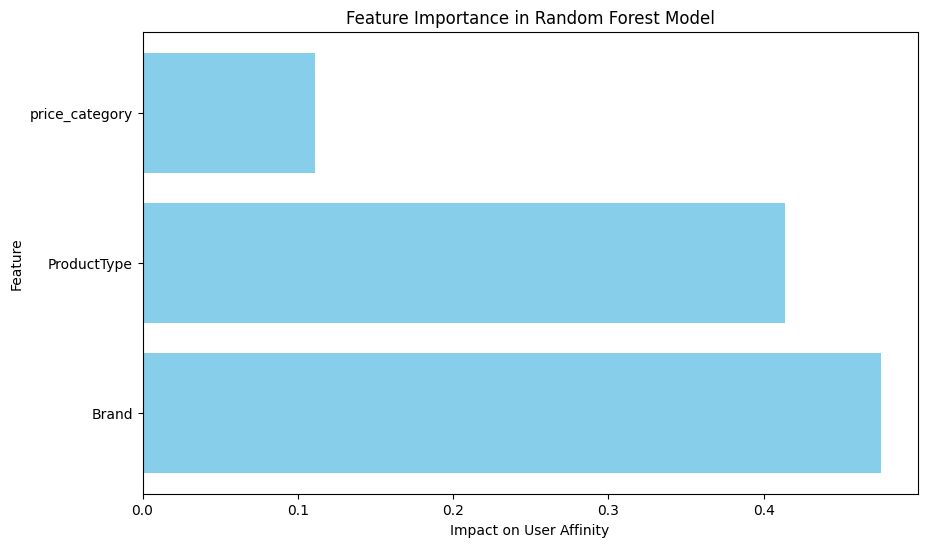

In [137]:
model_adj = RandomForestRegressor(n_estimators=100, random_state=42)
model_adj.fit(X_train_adj, y_train_adj)
y_pred_adj = model_adj.predict(X_test_adj)
mse_adj = mean_squared_error(y_test_adj, y_pred_adj)
print(f"Mean Squared Error: {mse_adj}")

feature_importances_adj = model_adj.feature_importances_
features_adj = X_adj.columns

plt.figure(figsize=(10, 6))
plt.barh(features_adj, feature_importances_adj, color='skyblue')
plt.xlabel('Impact on User Affinity')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [138]:
high_affin = E2.groupby('ProductType')['Affinity'].mean().reset_index()

/var/folders/sy/r49glz6958l7lh1w01w956wh0000gn/T/ipykernel_2084/3678679649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_affin = E2.groupby('ProductType')['Affinity'].mean().reset_index()


In [139]:
high_affin = high_affin.sort_values('Affinity', ascending=False).head(10)


In [140]:
print(high_affin)

           ProductType  Affinity
12              laptop  0.459892
17             toaster  0.454028
6               camera  0.445401
13           microwave  0.427963
18                  tv  0.424964
11                iron  0.415083
20  voltage stabilizer  0.414531
4       Water Purifier  0.406606
19              vacuum  0.404470
7               cooler  0.396691


In [141]:
plt.figure(figsize=(12, 6))

# Bar plot
bar_plot = sns.barplot(x="ProductType", y="Normalized_Affinity", data=df, palette="muted", alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Product Type')
plt.ylabel('Normalized Affinity Score')
plt.ylim(0, 1)
plt.title('Normalized Affinity Scores by Product Type')

# Adding values on top of the bars
for index, row in df.iterrows():
    bar_plot.text(row.name, row.Normalized_Affinity + 0.02, round(row.Normalized_Affinity, 2), color='black', ha="center")

plt.show()

ValueError: Could not interpret value `Normalized_Affinity` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
high_affin.to_excel('high_affin.xlsx', index=False)

In [ ]:
top_brands =  E2.groupby('Brand')['Affinity'].mean().reset_index()

/var/folders/sy/r49glz6958l7lh1w01w956wh0000gn/T/ipykernel_2084/592155232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_brands =  E2.groupby('Brand')['Affinity'].mean().reset_index()


In [ ]:
top_brands = top_brands.sort_values('Affinity', ascending=False).head(10)

top_brands.to_excel('top_brands.xlsx', index=False)

In [ ]:
print(top_brands)

          Brand  Affinity
79         Nova  0.764567
58      LIVPURE  0.742479
51          IFB  0.648269
31       Delite  0.566895
6         APPLE  0.538680
115     ZunVolt  0.526430
66          MSI  0.516565
62   Lighthouse  0.515317
87      Ponmani  0.493000
45           HP  0.492255


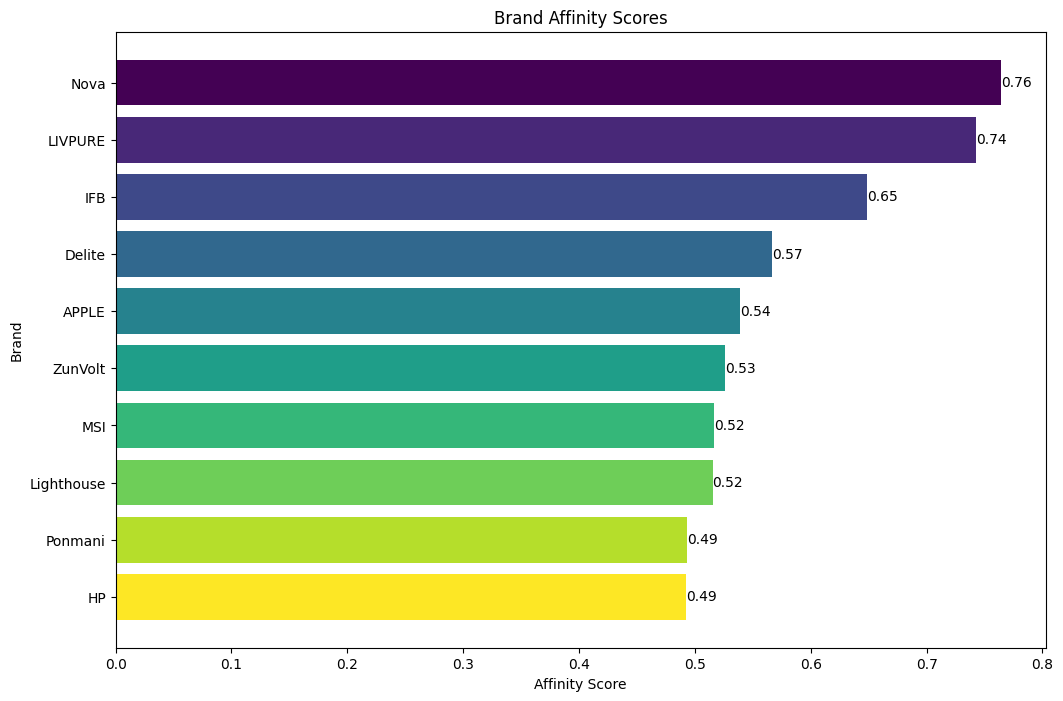

In [ ]:
brands = ['Nova', 'LIVPURE', 'IFB', 'Delite', 'APPLE', 'ZunVolt', 'MSI', 'Lighthouse', 'Ponmani', 'HP']
affinity = [0.764567, 0.742479, 0.648269, 0.566895, 0.538680, 0.526430, 0.516565, 0.515317, 0.493000, 0.492255]

# Define colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(brands)))

# Create bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(brands, affinity, color=colors)
plt.xlabel('Affinity Score')
plt.ylabel('Brand')
plt.title('Brand Affinity Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest affinity at the top

# Add text labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [ ]:
top_brands.to_excel('high_affin.xlsx', index=False)

In [ ]:
loved_pricecats = E2.groupby('price_category')['Affinity'].mean()

In [ ]:
print(loved_pricecats)

price_category
mid-range          0.398927
premium            0.444652
price-sensitive    0.333247
Name: Affinity, dtype: float64


In [ ]:
categories = ['mid-range', 'premium', 'price-sensitive']
affinity = [0.398927, 0.444652, 0.333247]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, affinity, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Affinity Score')
plt.ylabel('Price Category')
plt.title('Price Category Affinity Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest affinity at the top

# Add text labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10, color='black')


In [ ]:
loved_pricecats.to_excel('pricecat.xlsx', index='price_category')

In [ ]:
least_liked = high_affin.sort_values('Affinity', ascending=True).head(10)


In [ ]:
print(least_liked)

           ProductType  Affinity
7               cooler  0.396691
19              vacuum  0.404470
4       Water Purifier  0.406606
20  voltage stabilizer  0.414531
11                iron  0.415083
18                  tv  0.424964
13           microwave  0.427963
6               camera  0.445401
17             toaster  0.454028
12              laptop  0.459892
